DATA COLLECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Occupancy_Estimation.csv')
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [2]:
unique_values = df['Room_Occupancy_Count'].unique()
print(unique_values)
value_counts = df['Room_Occupancy_Count'].value_counts()
print(value_counts)


[1 2 3 0]
Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64


DATA PREPROCESSING AND DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

The dataset consists of 10,129 entries.There are different types of data in the dataset. The Date and Time columns are stored as text. 

The dataset mainly consists of sensor readings. 
Temperature (S1_Temp to S4_Temp), sound (S1_Sound to S4_Sound), and CO2 levels (S5_CO2 and S5_CO2_Slope) measure environmental conditions. 
Light sensors (S1_Light to S4_Light) and motion sensors (S6_PIR, S7_PIR) track activity. 
The target variable, Room_Occupancy_Count, tells us how many people are in the room, making this a classification problem where we predict occupancy based on sensor data.

In [4]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


Insights

Total number of rows10,129 and 19 columns.
Data types of each column:
'Date' and 'Time' are of type 'object', which indicates they are categorical.
All sensor measurement columns (e.g., S1_Temp, S2_Light, etc.) and the target 'Room_Occupancy_Count' are numeric.

In [5]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [6]:
df.duplicated().sum()

0

from the above lines we can confirm there are no potential duplicated values and null values

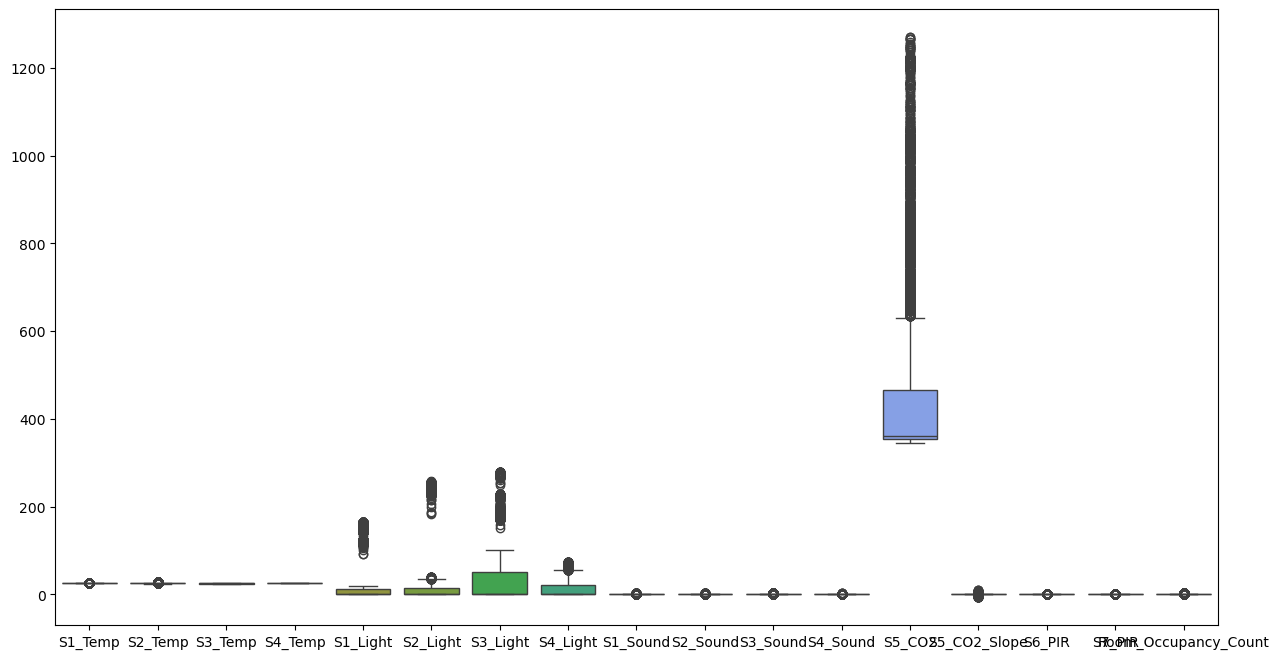

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.show()

from the boxplot it is clear that few columns have extreme outliers which can capped using IQR and rest of them can be handled using log transformation

In [8]:
df.select_dtypes(include=['number']).skew()

S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64

Temperature sensors: Mostly balanced, but S2_Temp has some high values that are not common.

Light sensors: More low-light readings, but some occasional bright values.

Sound sensors: Mostly quiet, but there are some spikes. S4_Sound has the highest variation.

CO2 levels: Generally stable, but some readings show sudden increases.

Motion sensors: Mostly low activity, but there are moments of high movement.

Room occupancy: Usually, there are only a few people in the room, but sometimes it gets crowded.


In [9]:
import numpy as np
import pandas as pd

# Function to cap outliers for all numeric columns except the target variable
def cap_outliers(df, target):
    df_capped = df.copy()
    numeric_cols = [col for col in df_capped.select_dtypes(include=['number']).columns if col != target]
    for col in numeric_cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped

# Apply capping to all numeric columns except the target "Room_Occupancy_Count" because of importance of target variable, if capped the classes will be removed
target = "Room_Occupancy_Count"
df_capped = cap_outliers(df, target)

# Function to apply a log transformation to specific columns
def log_transform_columns(df, columns):
    df_log = df.copy()
    for col in columns:
        df_log[col] = np.log1p(df_log[col])
    return df_log

# Specify the columns to log transform
columns_to_log = ["S1_Light", "S2_Light", "S3_Light", "S4_Light", "S4_Sound", "S5_CO2"]

# Apply log transformation on the capped data for the specified columns
df_clean = log_transform_columns(df_capped, columns_to_log)


We identified extreme values in numerical columns (except the target) and capped them within a reasonable range using the IQR method.
This helps prevent very large values from distorting the model while keeping useful variation in the data.

Columns like S1_Light, S2_Light, S3_Light, S4_Light, S4_Sound, and S5_CO2 had extreme skewness.
Applying a log transformation made these distributions more balanced, reducing the impact of large values.

In [10]:
unique_values = df_clean['Room_Occupancy_Count'].unique()
print(unique_values)
value_counts = df_clean['Room_Occupancy_Count'].value_counts()
print(value_counts)

[1 2 3 0]
Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64


For columns that are highly skewed (e.g., S1_Light, S2_Light, S3_Light, S4_Light), we use the IQR method to cap extreme values.
Values below the lower bound are replaced with the lower bound, and values above the upper bound are replaced with the upper bound.
This limits the impact of outliers on the overall distribution without completely removing those rows.
then Log Transformation for Moderately Skewed Columns
For columns that are moderately skewed (e.g., S5_CO2 and S4_Sound), applied a log transformation (using np.log1p) to compress the range of values.
The log transformation helps to normalize the distribution by reducing the influence of extreme values.

In [11]:
df_clean

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,3.433987,3.555348,3.988984,3.713572,0.080,0.075,0.060,0.058269,5.968708,0.069231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,3.433987,3.526361,3.988984,3.713572,0.095,0.050,0.060,0.058269,5.968708,0.069231,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,3.433987,3.555348,3.988984,3.713572,0.095,0.075,0.080,0.058269,5.968708,0.069231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,3.433987,3.555348,3.988984,3.713572,0.095,0.075,0.085,0.086178,5.968708,0.069231,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,3.433987,3.555348,4.007333,3.713572,0.095,0.060,0.060,0.058269,5.968708,0.069231,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,1.945910,2.079442,3.526361,3.135494,0.090,0.040,0.060,0.076961,5.846439,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,1.945910,2.079442,3.555348,3.135494,0.070,0.050,0.050,0.076961,5.846439,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,1.945910,2.079442,3.555348,3.135494,0.095,0.050,0.060,0.076961,5.846439,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,1.945910,2.079442,3.555348,3.135494,0.080,0.075,0.085,0.076961,5.846439,0.000000,0,0,0


In [12]:
#final check for skewness 
df_clean.select_dtypes(include=['number']).skew()

S1_Temp                 0.943261
S2_Temp                 0.991328
S3_Temp                 0.650162
S4_Temp                 0.129630
S1_Light                0.632297
S2_Light                0.621326
S3_Light                0.422660
S4_Light                0.470507
S1_Sound                0.379921
S2_Sound                0.913251
S3_Sound                0.823956
S4_Sound                1.116609
S5_CO2                  1.140072
S5_CO2_Slope           -0.462433
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count    2.057635
dtype: float64

In [13]:
#dropping 2 features because it falls under features that shows no correlation
df_clean = df_clean.drop(["S6_PIR", "S7_PIR"], axis=1)

Light and sound sensor values (S1_Light, S2_Light, etc.) show much lower skewness than before.

Modifying the target variable can change class distributions and affect model predictions, so i left it as is.

Since PIR sensor values (S6_PIR, S7_PIR) have a skew of 0.000, they likely contain binary or uniform values, meaning they don't need transformation.

EDA

<Figure size 1200x600 with 0 Axes>

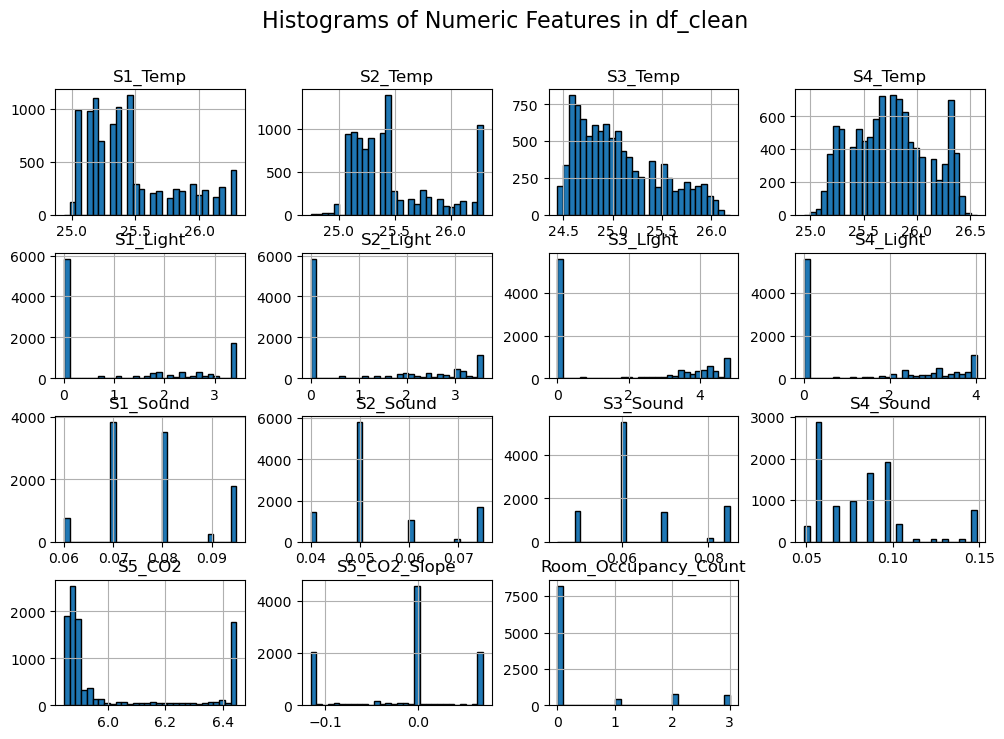

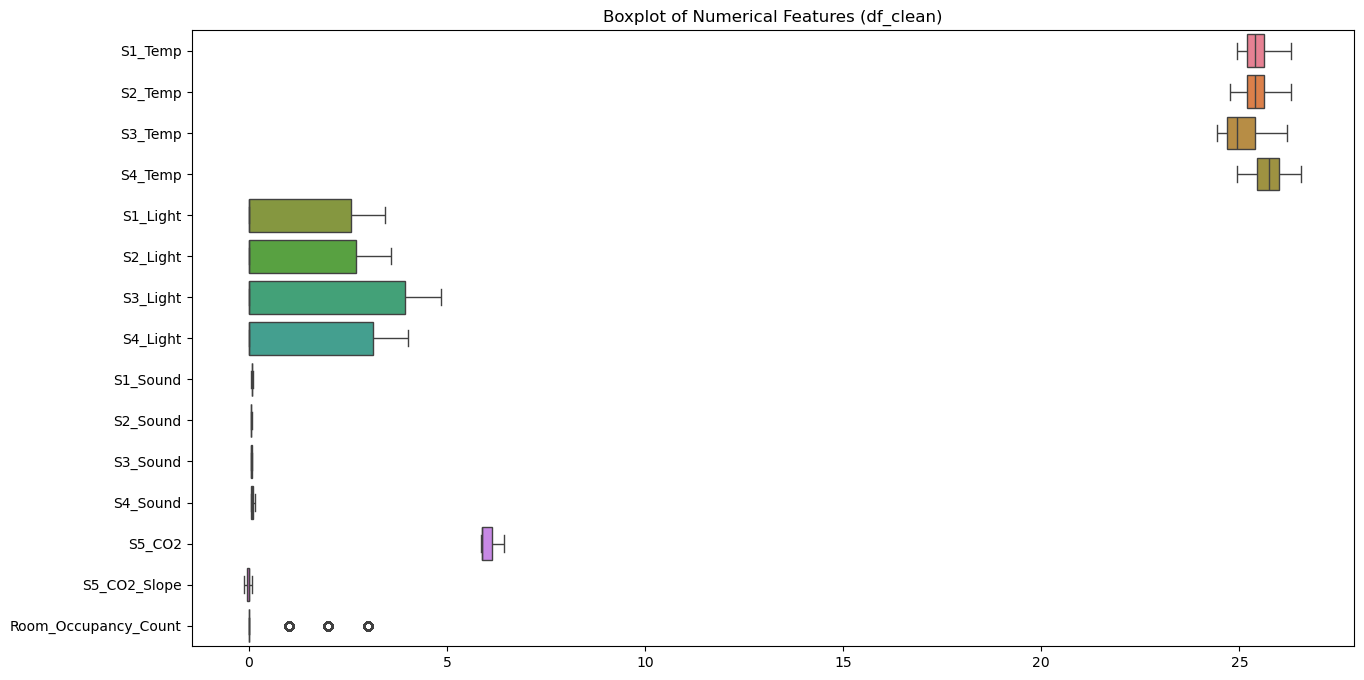

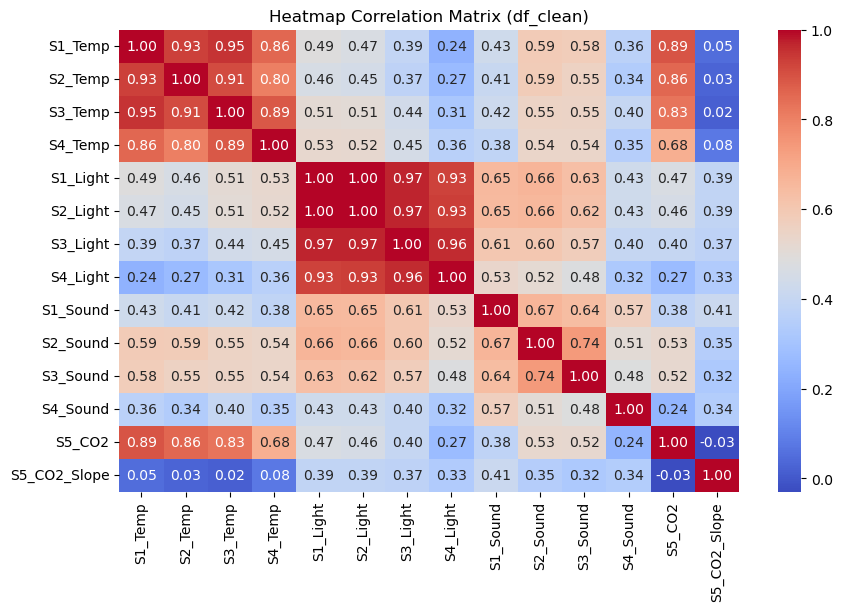

In [14]:
#histogram
plt.figure(figsize=(12, 6))
df_clean.select_dtypes(include=['number']).hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Numeric Features in df_clean", fontsize=16)
plt.show()

#Boxplot

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_clean, orient="h")
plt.title("Boxplot of Numerical Features (df_clean)")
plt.show()

# creating a numerical only df for finding correaltion
df_numeric = df_clean.select_dtypes(include=['number']).drop(["Room_Occupancy_Count"], axis=1)

#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Correlation Matrix (df_clean)")
plt.show()

The heatmap shows the correlation between different features in df_clean.

Strong correlations:
S1_Temp, S2_Temp, S3_Temp, and S4_Temp are highly correlated with each other (values above 0.9), indicating that temperature sensors in different locations show similar patterns.

S1_Light, S2_Light, S3_Light, and S4_Light also have strong correlations (values above 0.9), meaning that lighting conditions in different locations are similar.

S1_Temp and S5_CO2 show a strong negative correlation, which suggests that CO2 levels might decrease as temperature increases.

Weak correlations:
S5_CO2_Slope has weak correlations with most variables, implying it has less influence on the dataset.

Histogram Insights

Temperature sensors (S1_Temp, S2_Temp, S3_Temp, S4_Temp):temperatures vary between two main ranges.

Light sensors (S1_Light, S2_Light, S3_Light, S4_Light): Mostly low values but occasionally very high, suggesting light levels fluctuate a lot.

Sound sensors (S1_Sound, S2_Sound, S3_Sound, S4_Sound): Shows multiple peaks, meaning sound levels change frequently.

CO2 sensor (S5_CO2): Has sharp peaks, meaning CO2 levels spike at certain times rather than being evenly spread.



From the boxplot it is clear that the skewnwss has been significantly reduced and Handled easily from the above techniques we used

FEATURE ENGINEERING

In [15]:
df_clean = df_clean.drop(columns=["Time"])

to avoid creating an excessively large number of dummy variables. Since the time column typically has many unique values, one-hot encoding it would generate thousands of new features, which makes the dataset very high-dimensional and computationally heavy without adding much useful information.

In [16]:
#encoding the non numerical features now itself ,  for further cleaning and dimenstionality reduction using PCA

df_clean = pd.get_dummies(df_clean, columns=["Date"], drop_first=True)

# Verify the changes
print("Columns after dropping and encoding:")
print(df_clean.columns)

Columns after dropping and encoding:
Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'Room_Occupancy_Count', 'Date_2017/12/23',
       'Date_2017/12/24', 'Date_2017/12/25', 'Date_2017/12/26',
       'Date_2018/01/10', 'Date_2018/01/11'],
      dtype='object')


The Date and Time columns, originally non-numeric, have been converted into binary features using one-hot encoding.

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  float64
 5   S2_Light              10129 non-null  float64
 6   S3_Light              10129 non-null  float64
 7   S4_Light              10129 non-null  float64
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  float64
 13  S5_CO2_Slope          10129 non-null  float64
 14  Room_Occupancy_Count  10129 non-null  int64  
 15  Date_2017/12/23    

SPLITTING DATA

In [18]:
#splittinf data for training and testing
#By splitting first, we ensure that class imbalance handling, scaling, feature selection, and PCA are all applied only to the training data. 
#This prevents data leakage and makes the model’s performance evaluation more realistic.

from sklearn.model_selection import train_test_split
target = "Room_Occupancy_Count"
X = df_clean.drop(target, axis=1)
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Splitting the dataset before applying techniques scaling, PCA, or class balancing prevents data leakage.

FEATURE SELECTION

In [19]:
#Feature Selection using Random Forest
# Train a RandomForestClassifier to obtain feature importances.
#This code trains a Random Forest Classifier with 100 decision trees to learn patterns from the data. 
#It fits the model using X (features) and y (target), helping identify important features for better model performance. 
#The random_state=42 ensures consistent results.
# Train a Random Forest Classifier on all features.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importances and sorting them.
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# a threshold to select important features.
selected_features = feature_importances[feature_importances > 0.06].index

# Keeping only the selected features.
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Feature selection using Random Forest helps identify the most important predictors of room occupancy. By training a model with 100 decision trees, feature importance scores are calculated, and only those above 0.06 are retained. This reduces noise, improves efficiency, and prevents overfitting. Keeping only meaningful features leads to a simpler, faster, and more accurate model for the next step- PCA, class balancing and final training.

FEATURE SCALING 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

Standardization is a preprocessing technique that transforms numerical features to have a mean of 0 and a standard deviation of 1. This ensures all features contribute equally to the model, preventing those with larger values from dominating. It is particularly useful for improving the performance of machine learning algorithms that rely on distance calculations, such as PCA and logistic regression.

In [21]:
# Applying PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
print("Number of components after PCA:", X_train_pca.shape[1])


Number of components after PCA: 3


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a set of uncorrelated components while retaining most of the variance. Here, n_components=0.95 ensures that 95% of the original variance is preserved, helping reduce the number of features while maintaining important information. This improves computational efficiency and reduces overfitting risks.

In [23]:
#CHecking imbalance for training classes
y_train.value_counts()

Room_Occupancy_Count
0    6582
2     599
3     555
1     367
Name: count, dtype: int64

In [24]:
#from the above output we can clearly see that class 0has 6582 which is comparetively big difference along with other classes 
#so we balance the classes using SMOTE so that the prediction not biased not class 0 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

# Print shapes to verify everything.
print("Training set shape after SMOTE:", X_train_resampled.shape)
print("Test set shape:", X_test_pca.shape)

Training set shape after SMOTE: (26328, 3)
Test set shape: (2026, 3)


The dataset had an imbalance in class distribution, with class 0 being significantly larger than other classes. This could lead to a biased model favoring the majority class. To address this, SMOTE (Synthetic Minority Over-sampling Technique) is applied, which generates synthetic samples for the minority classes, balancing the dataset. This ensures the model learns from all classes equally, improving prediction accuracy.

In [25]:
#checking for class imbalance, here we can se it is equally distributed, so class is balanced
y_train_resampled.value_counts()

Room_Occupancy_Count
0    6582
2    6582
3    6582
1    6582
Name: count, dtype: int64

BUILDING THE MODEL AND MODEL EVALUATION

# Support Vector Machine (SVM)
SVM finds the best boundary to separate different classes. It works well with complex data but may struggle with imbalanced datasets.
If SVM accuracy is low, tuning parameters or balancing the data better may improve performance.

In [26]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# 1. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

print("SVM ")
svmscore = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

SVM 
Train Accuracy: 0.8700481303221029
Test Accuracy: 0.8692003948667325
Train Confusion Matrix:
[[1645    0    1    0]
 [  43    0   49    0]
 [  33    0  116    0]
 [  35    0  104    0]]


There were cases of Overfitting during training so , following tree based training models has been regularised from the hyper parameter in the argument itself
Tree-based models make decisions by splitting data based on feature values rather than combining features with weights like linear model do 
so here the feature tuned so that the model dont memorize and become biased

# Decision Tree 
A Decision Tree splits the data into smaller parts to make predictions. Regularization helps prevent overfitting by limiting tree depth and splits.

If the model overfits, reducing tree depth or adjusting split rules can improve generalization.

In [27]:
# 2. Decision Tree (Regularized)
#A small tree (depth 10) is less likely to memorize the training data
#min_samples_split=5-A node must have at least 5 samples before it can split into further branches. This stops the tree from splitting on very few data points.
#min_samples_leaf=2-Each leaf (end node) must contain at least 2 samples. This prevents the model from creating leaves that are too specific to the training data.
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print("Decision Tree")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
dtscore = accuracy_score(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Decision Tree
Training Accuracy: 0.9981488337652721
Test Accuracy: 0.9940769990128332
Test Confusion Matrix:
[[1645    0    0    1]
 [   0   91    1    0]
 [   0    1  148    0]
 [   3    0    6  130]]


# Random Forest 
Random Forest builds multiple decision trees and averages their results, making it more reliable than a single tree.

If it performs better than the Decision Tree, it confirms the advantage of ensemble methods. More trees may help, but too many won’t always improve accuracy.

In [28]:
# 3. Random Forest (Regularized)
#n_estimators=100-The model builds 100 decision trees. More trees can improve performance, but too many can overfit or slow down training.
#max_features='sqrt'-When making a split, the model considers only a random subset (the square root of the total number of features) of the features. 
#This randomness helps reduce overfitting by making trees less correlated with each other
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=6, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Random Forest")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
rfscore = accuracy_score(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Random Forest
Training Accuracy: 0.9974083672713809
Test Accuracy: 0.9965449160908193
Test Confusion Matrix:
[[1646    0    0    0]
 [   0   92    0    0]
 [   0    0  148    1]
 [   1    0    5  133]]


# K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) is a simple, instance-based algorithm that classifies data points by finding the majority class among their nearest neighbors. It does not make assumptions about the data distribution, making it effective for various problems. However, it can be computationally expensive for large datasets since it calculates distances for every new prediction.


In [29]:
# 4. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
knnscore = accuracy_score(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

K-Nearest Neighbors
Training Accuracy: 0.9977786005183266
Test Accuracy: 0.9965449160908193
Test Confusion Matrix:
[[1646    0    0    0]
 [   0   91    1    0]
 [   0    0  149    0]
 [   1    0    5  133]]


# Gradient Boosting 
Gradient Boosting is an ensemble learning technique that builds multiple weak decision trees sequentially, where each tree corrects the errors of the previous one. It minimizes loss by focusing more on difficult-to-classify samples, improving overall accuracy. This method is powerful for structured data but can be prone to overfitting if not properly tuned.

Gradient Boosting improves predictions step by step, learning from past mistakes. It’s powerful but can overfit if not properly tuned.


In [30]:
# 5. Gradient Boosting (Regularized)
#subsample=0.8-Each tree is built on a random 80% sample of the data, which introduces randomness and helps reduce overfitting.
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3,min_samples_split=5,subsample=0.8, min_samples_leaf=2, random_state=42)
gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

print("Gradient Boosting")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
gbscore = accuracy_score(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Gradient Boosting
Training Accuracy: 0.9992595335061089
Test Accuracy: 0.9965449160908193
Test Confusion Matrix:
[[1646    0    0    0]
 [   0   92    0    0]
 [   0    0  149    0]
 [   1    0    6  132]]


In [31]:
print(f"svm test accuracy is ",svmscore)
print(f"Decision tree test accuracy is ",dtscore)
print(f"Random forest  test accuracy is ",rfscore)
print(f"Gradient Boosting test accuracy is ",gbscore)
print(f"K-nearest neighbours test accuracy is ",knnscore)

svm test accuracy is  0.8692003948667325
Decision tree test accuracy is  0.9940769990128332
Random forest  test accuracy is  0.9965449160908193
Gradient Boosting test accuracy is  0.9965449160908193
K-nearest neighbours test accuracy is  0.9965449160908193


From the above output, comparing all the test accuracy generated from different model 
Random forest,Gradient Boosting and KNN turned out to be BEst accurate.


to improve the best model, i'm using here gradient boosting to tune to increase the accuracy

Hyperparameter Tuning

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of boosting stages
    'max_depth': [3, 4, 5],                  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],           # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0],                 # Fraction of samples to be used for fitting the individual base learners
    'learning_rate': [0.01, 0.05, 0.1]       # Learning rate shrinks the contribution of each tree
}

# Create a GradientBoostingClassifier instance
gb = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation and using accuracy as the scoring metric
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_gb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on training and test sets using the best model
y_train_pred = best_gb.predict(X_train)
y_test_pred = best_gb.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 0.8}
Training Accuracy: 0.9988893002591632
Test Accuracy: 0.9960513326752222
Test Confusion Matrix:
[[1646    0    0    0]
 [   0   91    1    0]
 [   0    0  149    0]
 [   1    0    6  132]]


Hyperparameter tuning is the process of selecting the best combination of model parameters to improve performance. It involves systematically testing different values to optimize accuracy, efficiency, and generalization. Techniques like Grid Search and Random Search are commonly used for this purpose.

High Accuracy: The tuned model achieves 99.8% test accuracy, indicating strong predictive performance.

Best Parameters: The selected hyperparameters balance tree depth, feature selection, and splits for optimal results


In [40]:
import joblib

joblib.dump(best_gb, 'gradient_boosting_model.pkl')
print("Gradient Boosting model saved successfully!")


Gradient Boosting model saved successfully!


This pipeline automates the preprocessing and modeling steps for predicting room occupancy. The numerical features undergo feature selection using SelectKBest, which picks the top 10 most relevant features based on statistical significance, followed by standardization using StandardScaler. Categorical features are one-hot encoded to convert them into numerical format. The processed data is then used to train a RandomForestClassifier, which is well-suited for handling both numerical and categorical data, also after the tuning this performed the best. The final accuracy on the test set indicates the model’s effectiveness in predicting room occupancy.

In [34]:
# Import required libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
df = pd.read_csv('Occupancy_Estimation.csv')  

# Defining features and target variable
X = df.drop('Room_Occupancy_Count', axis=1)  
y = df['Room_Occupancy_Count']  

# Identifying categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include='number').columns.tolist()

# Numerical pipeline: Feature selection
trf_numerical = Pipeline(steps=[('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Select top 15 features
                                ('scaler', StandardScaler())
                               ])

# Categorical pipeline: One-hot encoding
trf_categorical = Pipeline(steps=[('one_hot_encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))])

# Combining both pipelines
preprocessor = ColumnTransformer(transformers=[('num', trf_numerical, numerical_features),('cat', trf_categorical, categorical_features)])

# Creating and establishing the full pipeline with a classifier (here i choose random forest)
pipeline = Pipeline([('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))  ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the test set:", accuracy)
joblib.dump(pipeline, 'occupancy_pipeline.pkl')
print("Pipeline saved successfully!")

Accuracy on the test set: 0.9985192497532083
Pipeline saved successfully!


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [35]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('feature_selection',
                                                                   SelectKBest()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['S1_Temp', 'S2_Temp',
                                                   'S3_Temp', 'S4_Temp',
                                                   'S1_Light', 'S2_Light',
                                                   'S3_Light', 'S4_Light',
                                                   'S1_Sound', 'S2_Sound',
                                                   'S3_Sound', 'S4_Sound',
                                                   'S5_CO2', 'S5_CO2_Slope',
                                                   'S6_PIR', 'S7_PIR']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Date', 'Time'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [36]:
#here i am loading the saved pipeline model and using unseen data for testing the prediction
import pandas as pd
import joblib

# Load the saved pipeline
pipeline = joblib.load('occupancy_pipeline.pkl')

# Load unseen data from CSV
unseen_data = pd.read_csv('Occupancy_unseen.csv')
unseen_data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
1,2017/12/22,11:43:18,25.44,25.56,24.94,25.88,155,236,71,54,1.53,1.24,0.36,0.27,500,2.457692,1,0,2


In [37]:
#as we can see here i have created 2 rows with random values based on the training data and the target is also displayed, which is 1 and 2

In [38]:
#Now splitting the data , removing the target feature
unseen_data = unseen_data.drop('Room_Occupancy_Count', axis=1)
unseen_data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
1,2017/12/22,11:43:18,25.44,25.56,24.94,25.88,155,236,71,54,1.53,1.24,0.36,0.27,500,2.457692,1,0


In [39]:
# Make predictions using the loaded pipeline
predictions = pipeline.predict(unseen_data)

# Print the predictions
print("Predictions on unseen data:")
print(predictions)

Predictions on unseen data:
[1 2]


Prediction is completed and as we can see the target splitted earlier is exactly the right prediction made by the model trained

CONCLUSION

We built a complete pipeline to predict room occupancy from sensor data. 
First, we cleaned the data by handling outliers and adjusting skewed values, and we converted categorical fields into numbers. 
Then, we selected the most important features and scaled the data so that all values are comparable. 
We split the data into training and testing sets and balanced the classes to ensure fair learning. 
Finally, we trained and fine-tuned several models, and saved our best pipeline so it’s ready to predict on new data. 
This step-by-step approach helps ensure our model is robust and works well in real-world situations.